What I need in this file. Only for FreeRecall
Confidence interval over how many errors there where made.
Histogram that compares normal, speed, memory, and sees how many times the first number was wrong.
Histogram that compares normal, speed, memory, and sees how many times the last number was wrong.
Histogram that compares normal, speed, memory, errors made.
A graph over errors made in speed

Files needed
combined_memorypattern_data.csv
combined_normal_data.csv
combined_speed_data.csv

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Example dataset
dataNORMAL = pd.read_csv("TotalNormal.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()
dataPATTERN = pd.read_csv("TotalMemoryPattern.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()
dataSPEED = pd.read_csv("TotalSpeed.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()

# Calculate mean
meanNORMAL = np.mean(dataNORMAL)
meanPATTERN = np.mean(dataPATTERN)
meanSPEED = np.mean(dataSPEED)

# 95% Confidence Interval using t-distribution
confidence = 0.95
nNORMAL = len(dataNORMAL)
nPATTERN = len(dataPATTERN)
nSPEED = len(dataSPEED)
stderrNORMAL = st.sem(dataNORMAL)
stderrPATTERN = st.sem(dataPATTERN)
stderrSPEED = st.sem(dataSPEED)
ciNORMAL = st.t.interval(confidence, nNORMAL-1, loc=meanNORMAL, scale=stderrNORMAL)
ciPATTERN = st.t.interval(confidence, nPATTERN-1, loc=meanPATTERN, scale=stderrPATTERN)
ciSPEED = st.t.interval(confidence, nSPEED-1, loc=meanSPEED, scale=stderrSPEED)

print("Mean NORMAL:", meanNORMAL)
print("95% Confidence Interval NORMAL:", ciNORMAL)
print("Mean PATTERN:", meanPATTERN)
print("95% Confidence Interval PATTERN:", ciPATTERN)
print("Mean SPEED:", meanSPEED)
print("95% Confidence Interval SPEED:", ciSPEED)

Mean NORMAL: 6.314285714285714
95% Confidence Interval NORMAL: (np.float64(5.809074796466243), np.float64(6.819496632105185))
Mean PATTERN: 6.6
95% Confidence Interval PATTERN: (np.float64(5.8277598701332405), np.float64(7.372240129866759))
Mean SPEED: 5.9
95% Confidence Interval SPEED: (np.float64(5.329851696515699), np.float64(6.470148303484302))


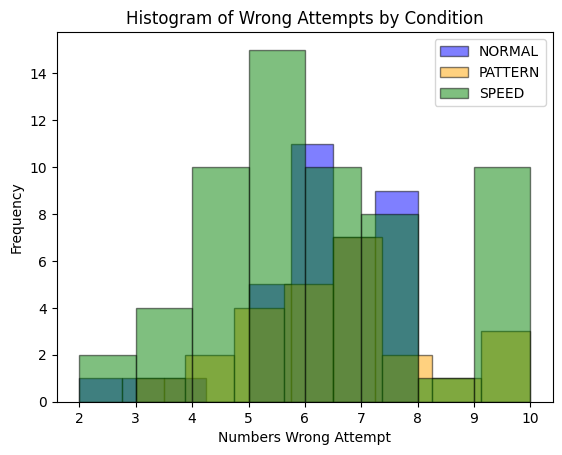

In [2]:
#Histograms
import matplotlib.pyplot as plt
plt.hist(dataNORMAL, bins=8, alpha=0.5, label='NORMAL', color='blue', edgecolor='black')
plt.hist(dataPATTERN, bins=8, alpha=0.5, label='PATTERN', color='orange', edgecolor='black')
plt.hist(dataSPEED, bins=8, alpha=0.5, label='SPEED', color='green', edgecolor='black')
plt.xlabel('Numbers Wrong Attempt')
plt.ylabel('Frequency')
plt.title('Histogram of Wrong Attempts by Condition')
plt.legend()
plt.show()

In [3]:
# Datapath (load as numeric Series)
import pandas as pd
import numpy as np

# Ensure 1D integer Series for plotting
first_normal = pd.read_csv("TotalNormal.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_normal = pd.read_csv("TotalNormal.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
first_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
first_speed = pd.read_csv("TotalSpeed.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_speed = pd.read_csv("TotalSpeed.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)

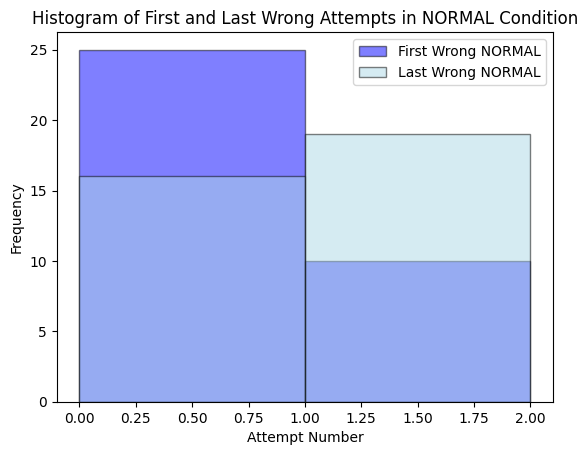

First Wrong NORMAL attempts: 35
Last Wrong NORMAL attempts: 35


In [4]:
#Histogram for Normal
plt.hist(first_normal, bins=range(int(first_normal.min()), int(first_normal.max()) + 2), alpha=0.5, label='First Wrong NORMAL', color='blue', edgecolor='black')
plt.hist(last_normal, bins=range(int(last_normal.min()), int(last_normal.max()) + 2), alpha=0.5, label='Last Wrong NORMAL', color='lightblue', edgecolor='black')
plt.xlabel('Attempt Number')
plt.ylabel('Frequency')
plt.title('Histogram of First and Last Wrong Attempts in NORMAL Condition')
plt.legend()
plt.show()

#Print total number of first and last wrong attempts
print("First Wrong NORMAL attempts:", first_normal.count())
print("Last Wrong NORMAL attempts:", last_normal.count())

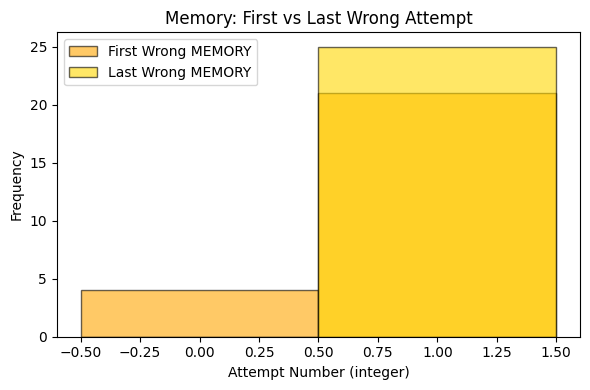

First Wrong MEMORY attempts: 25
Last Wrong MEMORY attempts: 25


In [5]:
# Histogram for Memory with integer-centered bins
import matplotlib.pyplot as plt

if len(first_memory) and len(last_memory):
    min_bin = int(min(first_memory.min(), last_memory.min()))
    max_bin = int(max(first_memory.max(), last_memory.max()))
    bins = np.arange(min_bin - 0.5, max_bin + 1.5, 1)

    plt.figure(figsize=(6,4))
    plt.hist(first_memory, bins=bins, alpha=0.6, label='First Wrong MEMORY', color='orange', edgecolor='black')
    plt.hist(last_memory, bins=bins, alpha=0.6, label='Last Wrong MEMORY', color='gold', edgecolor='black')
    plt.xlabel('Attempt Number (integer)')
    plt.ylabel('Frequency')
    plt.title('Memory: First vs Last Wrong Attempt')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('Memory: no data to plot')

#Print total number of first and last wrong attempts
print("First Wrong MEMORY attempts:", first_memory.count())
print("Last Wrong MEMORY attempts:", last_memory.count())

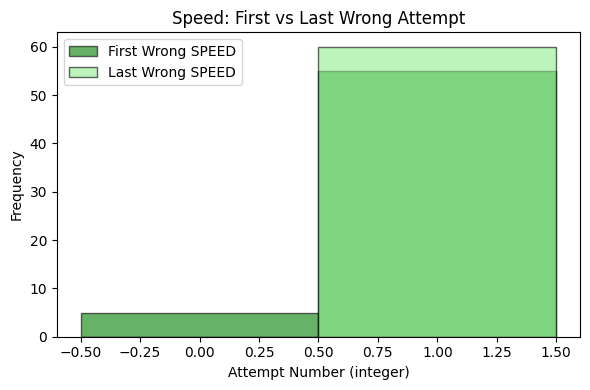

First Wrong SPEED attempts: 60
Last Wrong SPEED attempts: 60


In [6]:
# Histogram for Speed with integer-centered bins
import matplotlib.pyplot as plt

if len(first_speed) and len(last_speed):
    min_bin = int(min(first_speed.min(), last_speed.min()))
    max_bin = int(max(first_speed.max(), last_speed.max()))
    bins = np.arange(min_bin - 0.5, max_bin + 1.5, 1)

    plt.figure(figsize=(6,4))
    plt.hist(first_speed, bins=bins, alpha=0.6, label='First Wrong SPEED', color='green', edgecolor='black')
    plt.hist(last_speed, bins=bins, alpha=0.6, label='Last Wrong SPEED', color='lightgreen', edgecolor='black')
    plt.xlabel('Attempt Number (integer)')
    plt.ylabel('Frequency')
    plt.title('Speed: First vs Last Wrong Attempt')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('Speed: no data to plot')

#Print total number of first and last wrong attempts
print("First Wrong SPEED attempts:", first_speed.count())
print("Last Wrong SPEED attempts:", last_speed.count())

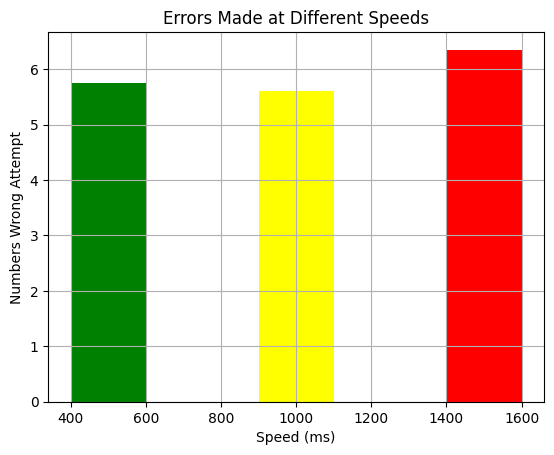

Average mistakes at 500ms: 5.75
Average mistakes at 1000ms: 5.6
Average mistakes at 1500ms: 6.35


In [8]:
#Graph over errors made per speed
import matplotlib.pyplot as plt
data = pd.read_csv("TotalSpeed.csv", usecols=["speed_ms", "numbers_wrong_attempt"]).dropna()


#Errors made on speed 1500ms
dataSPEED = data[data['speed_ms'] == 1500]['numbers_wrong_attempt']

#Errors made on speed 1000ms
dataSPEED = data[data['speed_ms'] == 1000]['numbers_wrong_attempt']

#Errors made on speed 500ms
dataSPEED = data[data['speed_ms'] == 500]['numbers_wrong_attempt']

#Graphing the data: X axis is speed, Y axis is numbers wrong attempt
plt.bar([500, 1000, 1500], [data[data['speed_ms'] == 500]['numbers_wrong_attempt'].mean(),
                             data[data['speed_ms'] == 1000]['numbers_wrong_attempt'].mean(),
                             data[data['speed_ms'] == 1500]['numbers_wrong_attempt'].mean()],
        color=['green', 'yellow', 'red'], width=200)
plt.xlabel('Speed (ms)')
plt.ylabel('Numbers Wrong Attempt')
plt.title('Errors Made at Different Speeds')
plt.grid()
plt.show()

#Numbers of mistake per speed
print("Average mistakes at 500ms:", data[data['speed_ms'] == 500]['numbers_wrong_attempt'].mean())
print("Average mistakes at 1000ms:", data[data['speed_ms'] == 1000]['numbers_wrong_attempt'].mean())
print("Average mistakes at 1500ms:", data[data['speed_ms'] == 1500]['numbers_wrong_attempt'].mean())